In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Socio-Economic%20Country%20Profiles/soci_econ_country_profiles.csv", index_col=0)
df

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.200,95.900,632343,2.400,14564.500,6.0,27.800,66.200,2.000,24.800,73.100,6.500,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.800,1.0,2.300,24.9/15.4,2086.3/4.8,5.0,13.700,4.800,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.900,143.900,69.400,256,10.000,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.590,58.400,37.370,73.300,52.570,12.070,37.950,53.330,90.670,3.770,3.900,26.530,25.640,333.230,

In [43]:
df.loc[df["Economy: Agriculture (% of GVA)"] == "~0.0", "Economy: Agriculture (% of GVA)"] = 0
df["Economy: Agriculture (% of GVA)"]=pd.to_numeric(df["Economy: Agriculture (% of GVA)"])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surface area (km2),66.000,1383839.121,3110735.102,719.000,65367.000,284053.500,792961.750,17098246.000
Population in thousands (2017),66.000,86551.364,238173.609,1180.000,7155.000,18867.000,65881.500,1409517.000
"Population density (per km2, 2017)",66.000,367.761,1296.705,3.200,46.725,104.100,211.325,8155.500
"Sex ratio (m per 100 f, 2017)",66.000,103.094,32.662,85.100,95.450,97.350,100.150,301.200
GDP: Gross domestic product (million current US$),66.000,1054142.924,2626195.051,10052.000,166835.000,305272.000,742210.500,18036648.000
"GDP growth rate (annual %, const. 2005 prices)",66.000,2.503,4.084,-9.900,1.425,2.400,3.775,26.300
GDP per capita (current US$),66.000,23531.648,20582.322,1410.400,6253.775,15323.500,40398.550,80831.100
Economy: Agriculture (% of GVA),66.000,4.985,4.897,0.000,1.800,3.500,7.175,25.500
Economy: Industry (% of GVA),66.000,29.689,8.588,7.200,24.075,28.450,34.875,56.400
Economy: Services and other activity (% of GVA),66.000,65.398,10.368,43.500,59.325,65.650,72.400,92.700


In [44]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
   dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
   return dataframe

def degisken_tiplerine_ayirma(data,cat_th,car_th):
   """
   Veri:data parametresi ili fonksiyona girilen verinin değişkenlerin sınıflandırılması.
   Parameters
   ----------
   data: pandas.DataFrame
   İşlem yapılacak veri seti
   cat_th:int
   categoric değişken threshold değeri
   car_th:int
   Cardinal değişkenler için threshold değeri
   Returns
   -------
    cat_deg:list
    categorik değişken listesi
    num_deg:list
    numeric değişken listesi
    car_deg:list
    categoric ama cardinal değişken listesi
   Examples
   -------
    df = dataset_yukle("breast_cancer")
    cat,num,car=degisken_tiplerine_ayirma(df,10,20)
   Notes
   -------
    cat_deg + num_deg + car_deg = toplam değişken sayısı
   """


   num_but_cat=[i for i in data.columns if data[i].dtypes !="O" and data[i].nunique() < cat_th]

   car_deg=[i for i in data.columns if data[i].dtypes == "O" and data[i].nunique() > car_th]

   num_deg=[i for i in data.columns if data[i].dtypes !="O" and i not in num_but_cat]

   cat_deg = [i for i in data.columns if data[i].dtypes == "O" and i not in car_deg]

   cat_deg = cat_deg+num_but_cat

   print(f"Dataset kolon/değişken sayısı: {data.shape[1]}")
   print(f"Dataset satır/veri sayısı: {data.shape[0]}")
   print("********************************************")
   print(f"Datasetin numeric değişken sayısı: {len(num_deg)}")
   print(f"Datasetin numeric değişkenler: {num_deg}")
   print("********************************************")
   print(f"Datasetin categoric değişken sayısı: {len(cat_deg)}")
   print(f"Datasetin categoric değişkenler: {cat_deg}")
   print("********************************************")
   print(f"Datasetin cardinal değişken sayısı: {len(car_deg)}")
   print(f"Datasetin cardinal değişkenler: {car_deg}")
   print("********************************************")

   return cat_deg,num_deg,car_deg

def calculate_estimated_salary(df,key):
    sorted_df=df[(df[key[0]]==1 )&(df[key[1]]==1 )&(df[key[2]]==1 )]
    return sorted_df["Avg Salary(K)"].mean()

def pred_model(model, **datasets):
   pred_val = model.predict(datasets['X_test'])
   pred_val = pd.DataFrame(pred_val, index=datasets['X_test'].index, columns=['pred'])

   pred_test = model.predict(datasets['X_test'])

   return pred_test, pred_val


def objective_lgb(trial):
   learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.25, log=True)
   reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-9, 100.0)
   reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-9, 100.0)
   subsample = trial.suggest_float("subsample", 0.0001, 1.0)
   colsample_bytree = trial.suggest_float("colsample_bytree", 0.0001, 1.0)
   max_depth = trial.suggest_int("max_depth", 1, 50)
   early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 100, 700)
   n_estimators = trial.suggest_int("n_estimators", 0, 10000)

   model = LGBMRegressor(
      random_state=50,
      tree_method="gpu_hist",
      gpu_id=0,
      predictor="gpu_predictor",
      n_estimators=n_estimators,
      learning_rate=learning_rate,
      reg_lambda=reg_lambda,
      reg_alpha=reg_alpha,
      subsample=subsample,
      colsample_bytree=colsample_bytree,
      max_depth=max_depth,
   )
   model.fit(
      datasets['X_train'],
      datasets['y_train'],
      early_stopping_rounds=early_stopping_rounds,
      eval_set=[(datasets['X_test'], datasets['y_test'])],
      verbose=1200,
   )
   preds_valid = model.predict(datasets['X_test'])
   rmse = mean_squared_error(datasets['y_test'], preds_valid, squared=False)

   return rmse
def eda(df,column):
    plt.figure(figsize=(30,15))
    sns.barplot(x="country",y="Economy: Services and other activity (% of GVA)",data=df)
    plt.xlabel("Countries")
    plt.ylabel(column)
    plt.title(column+" For Each Countries",fontsize=20)
    plt.xticks(rotation=90)
    plt.show()

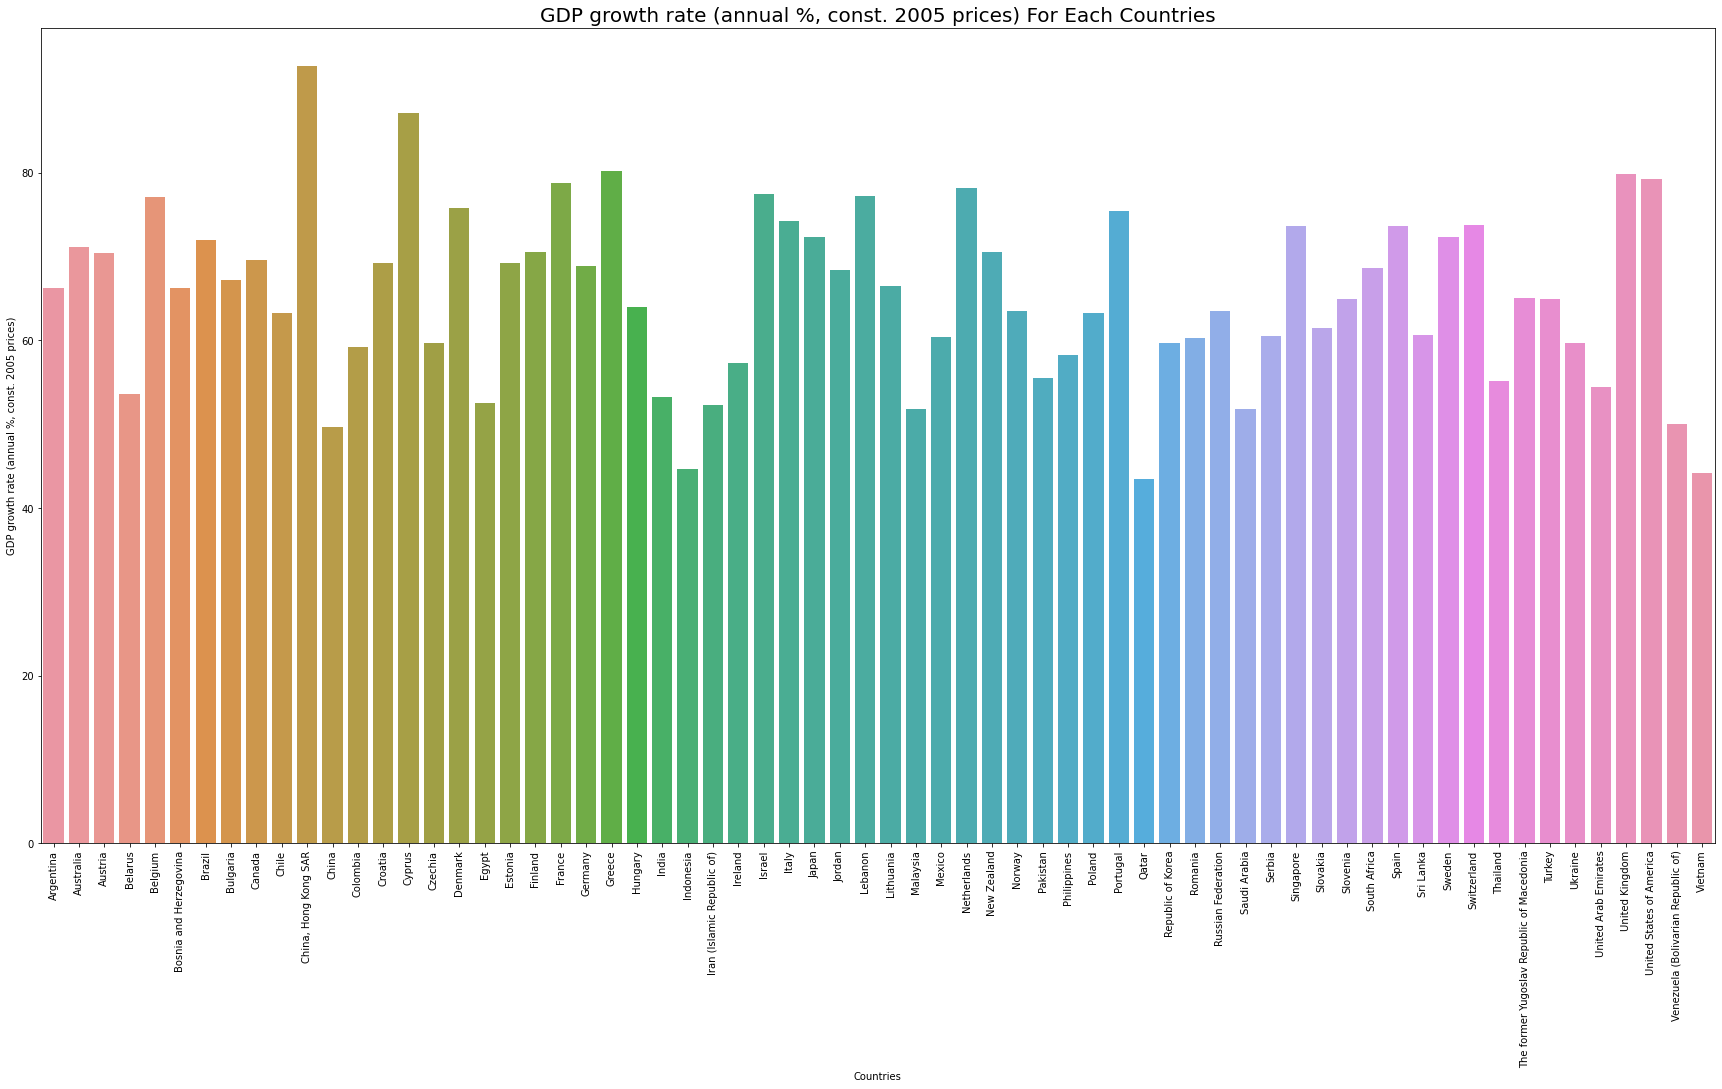

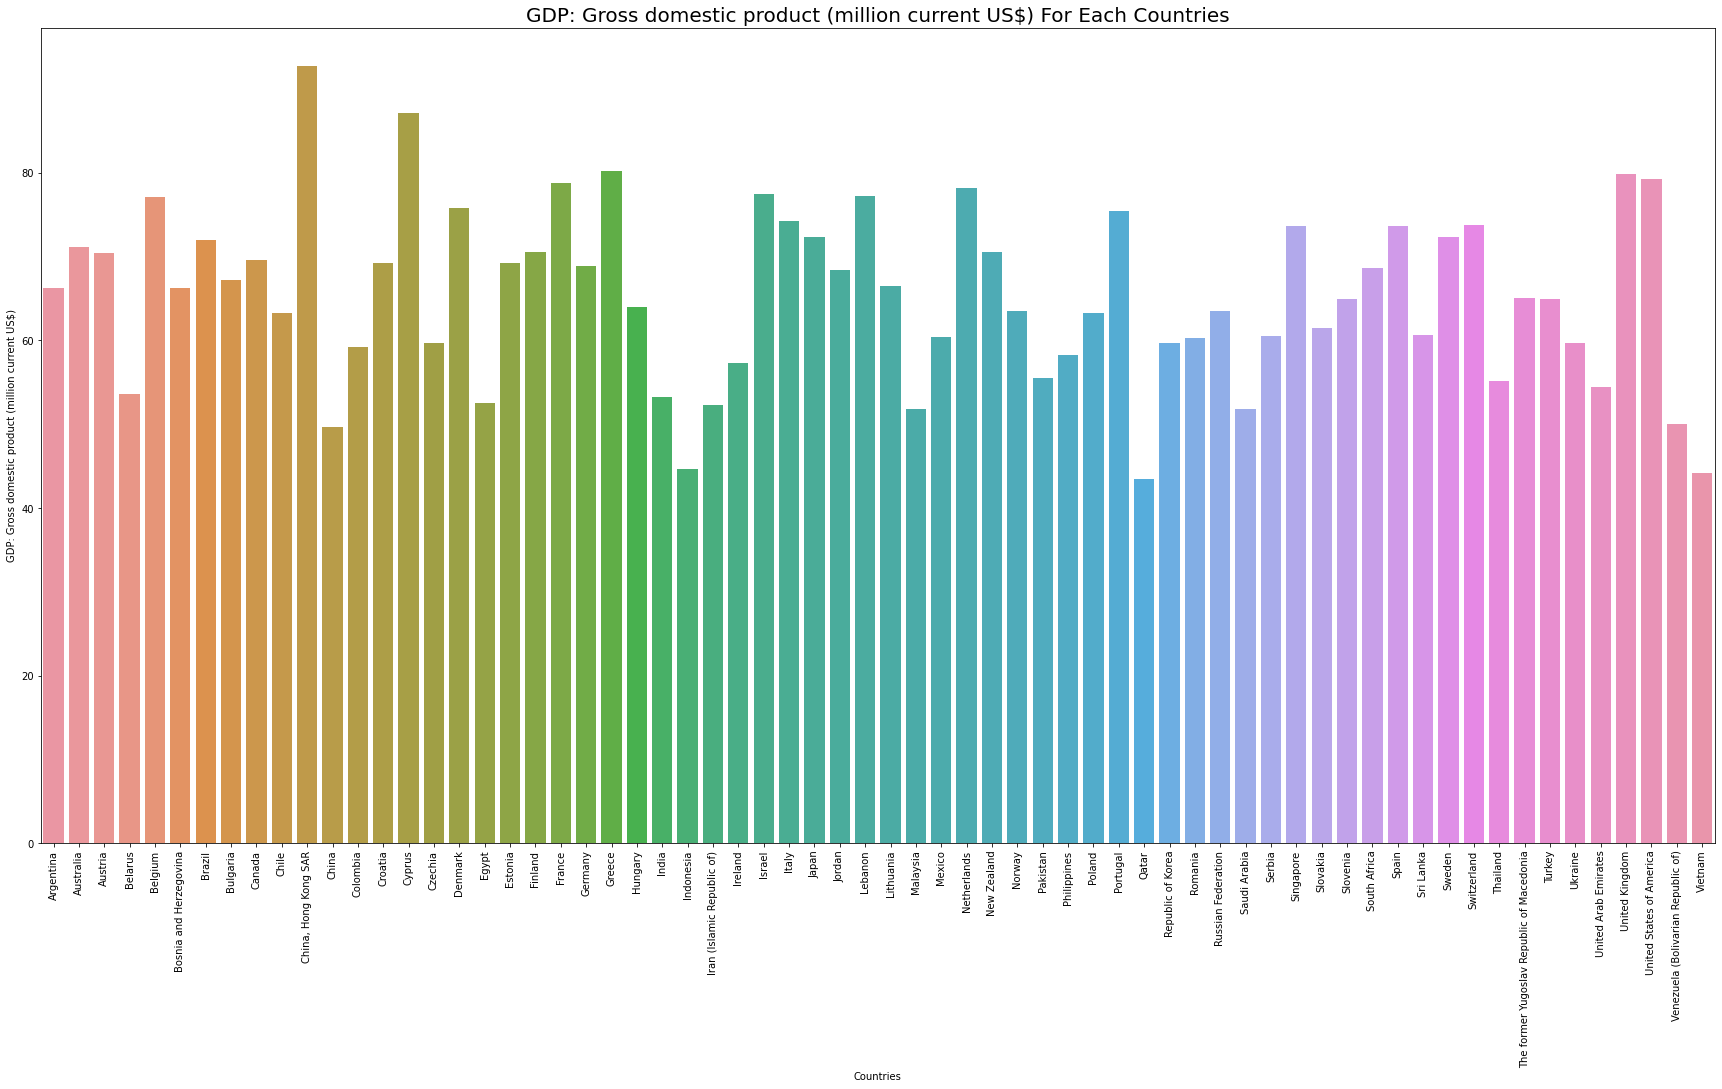

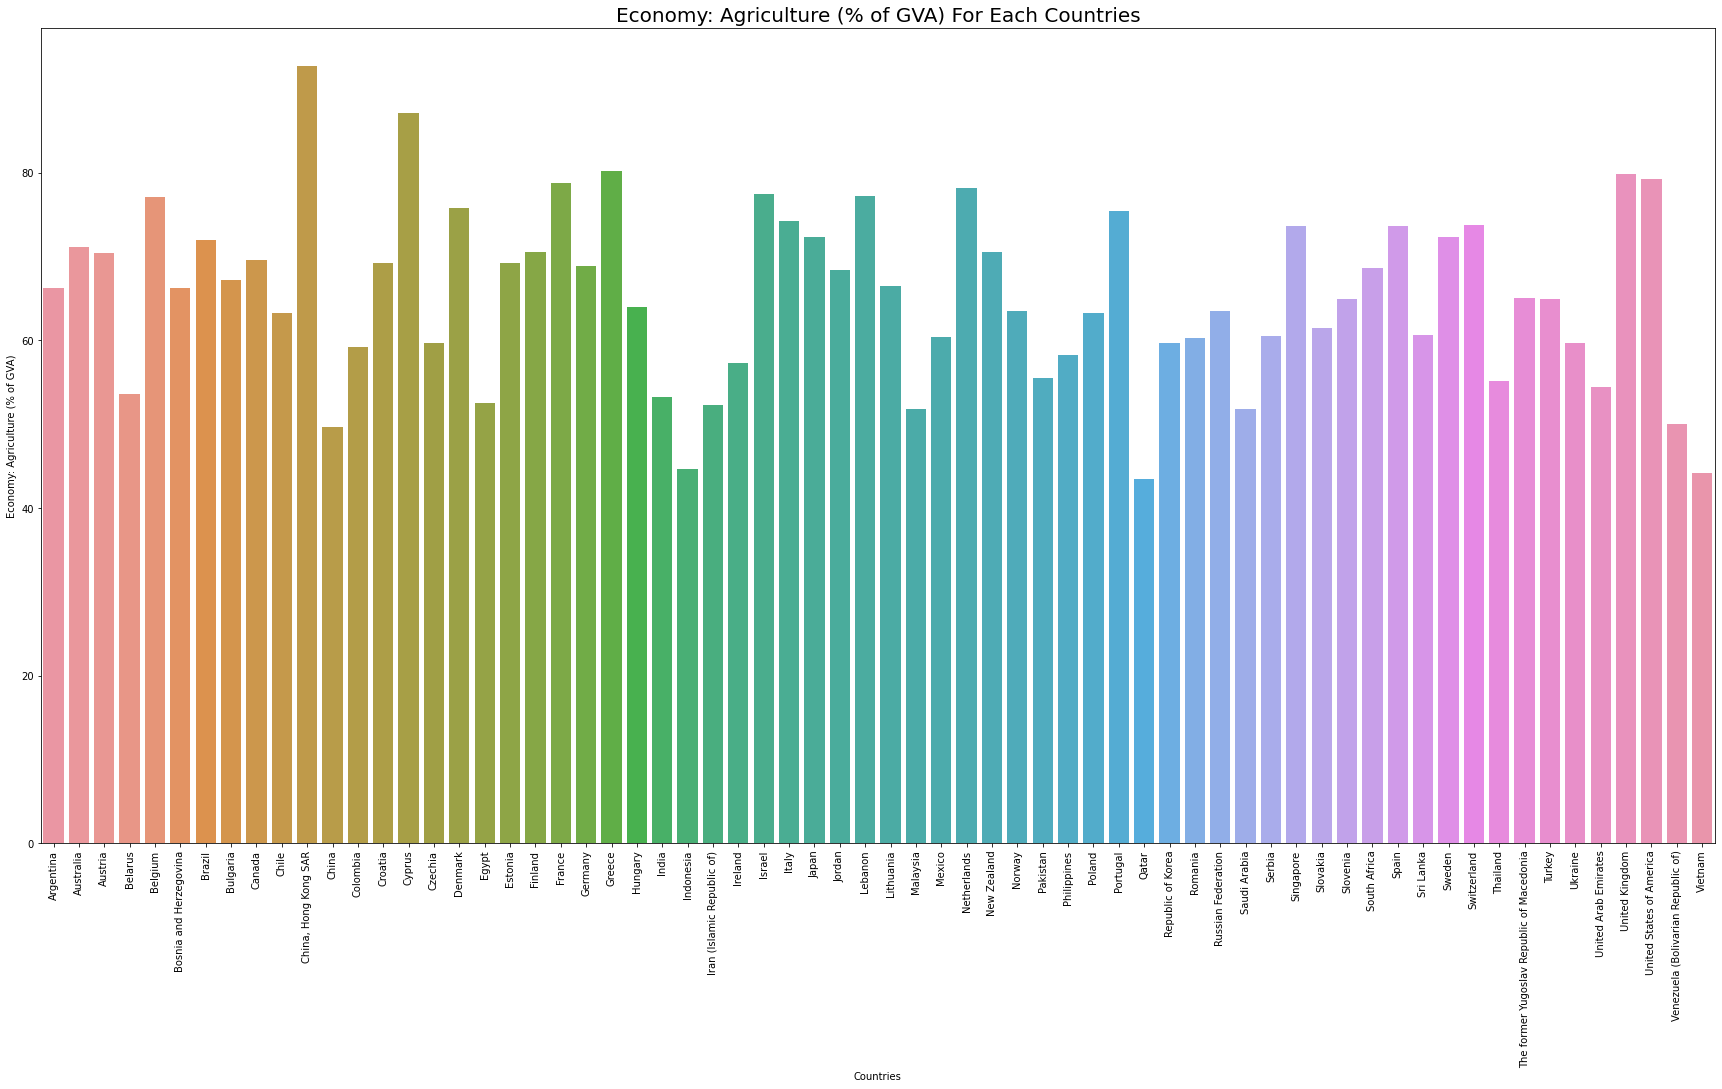

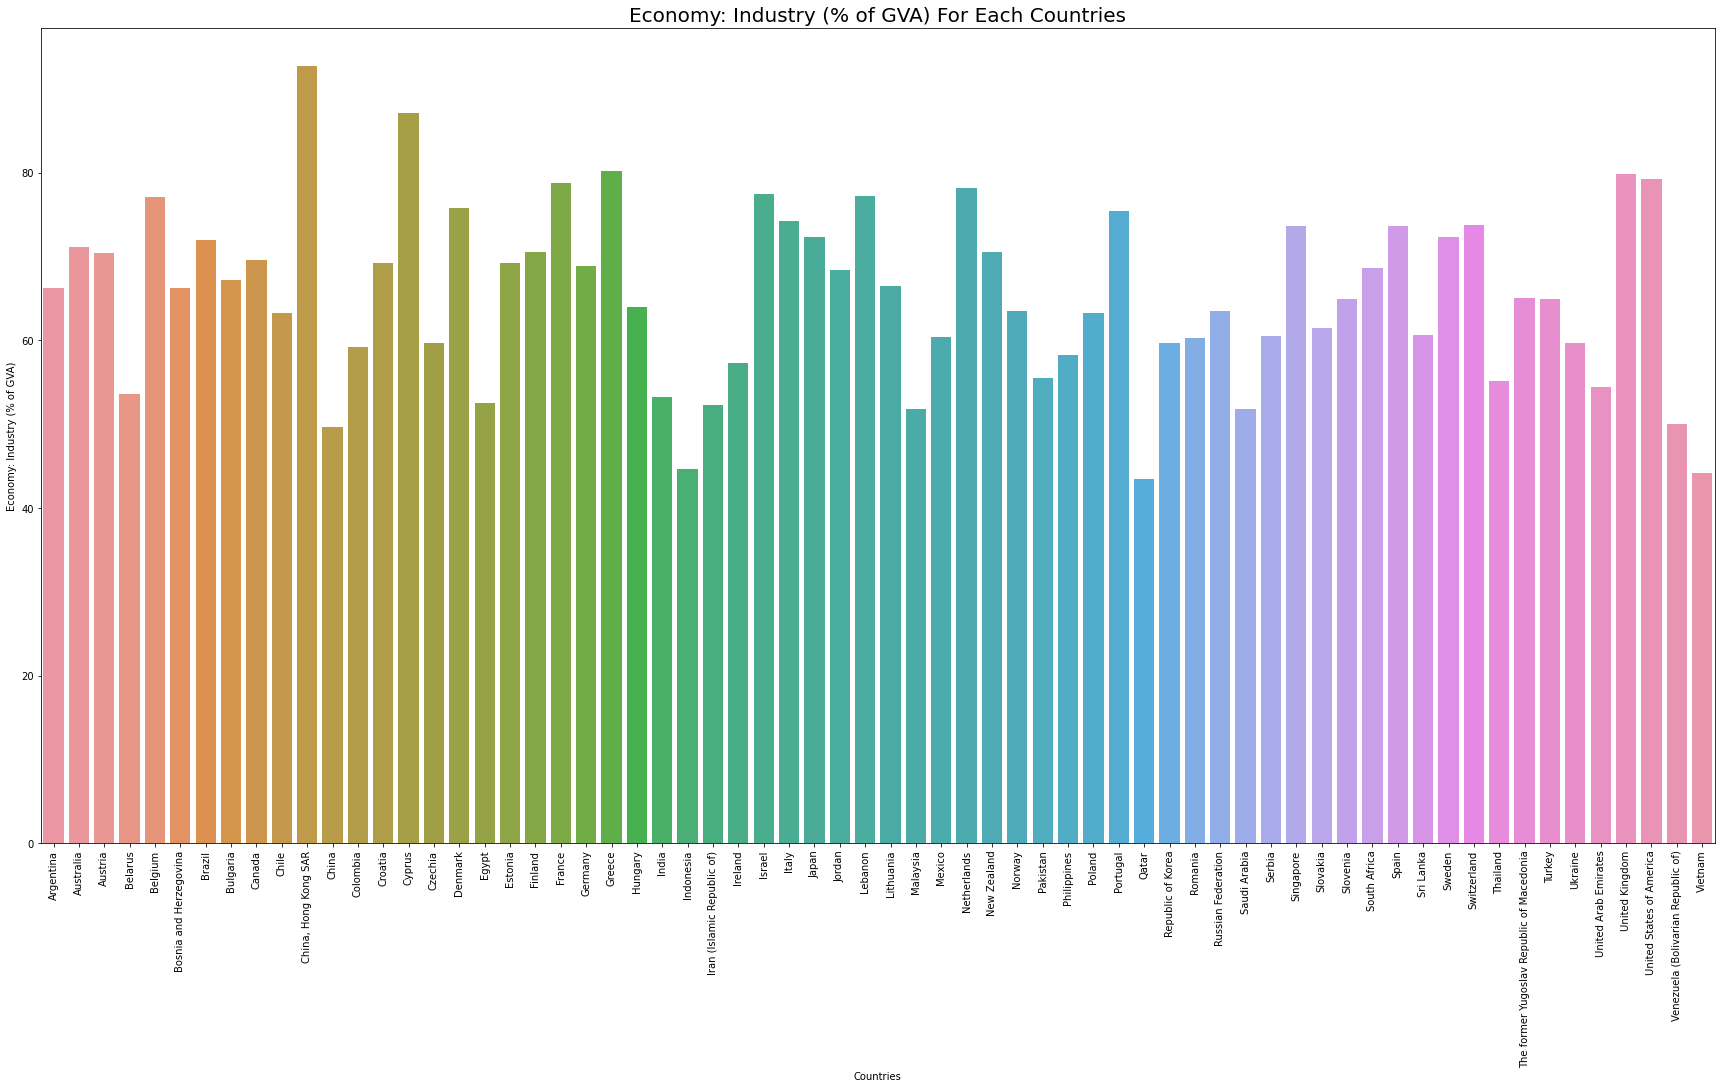

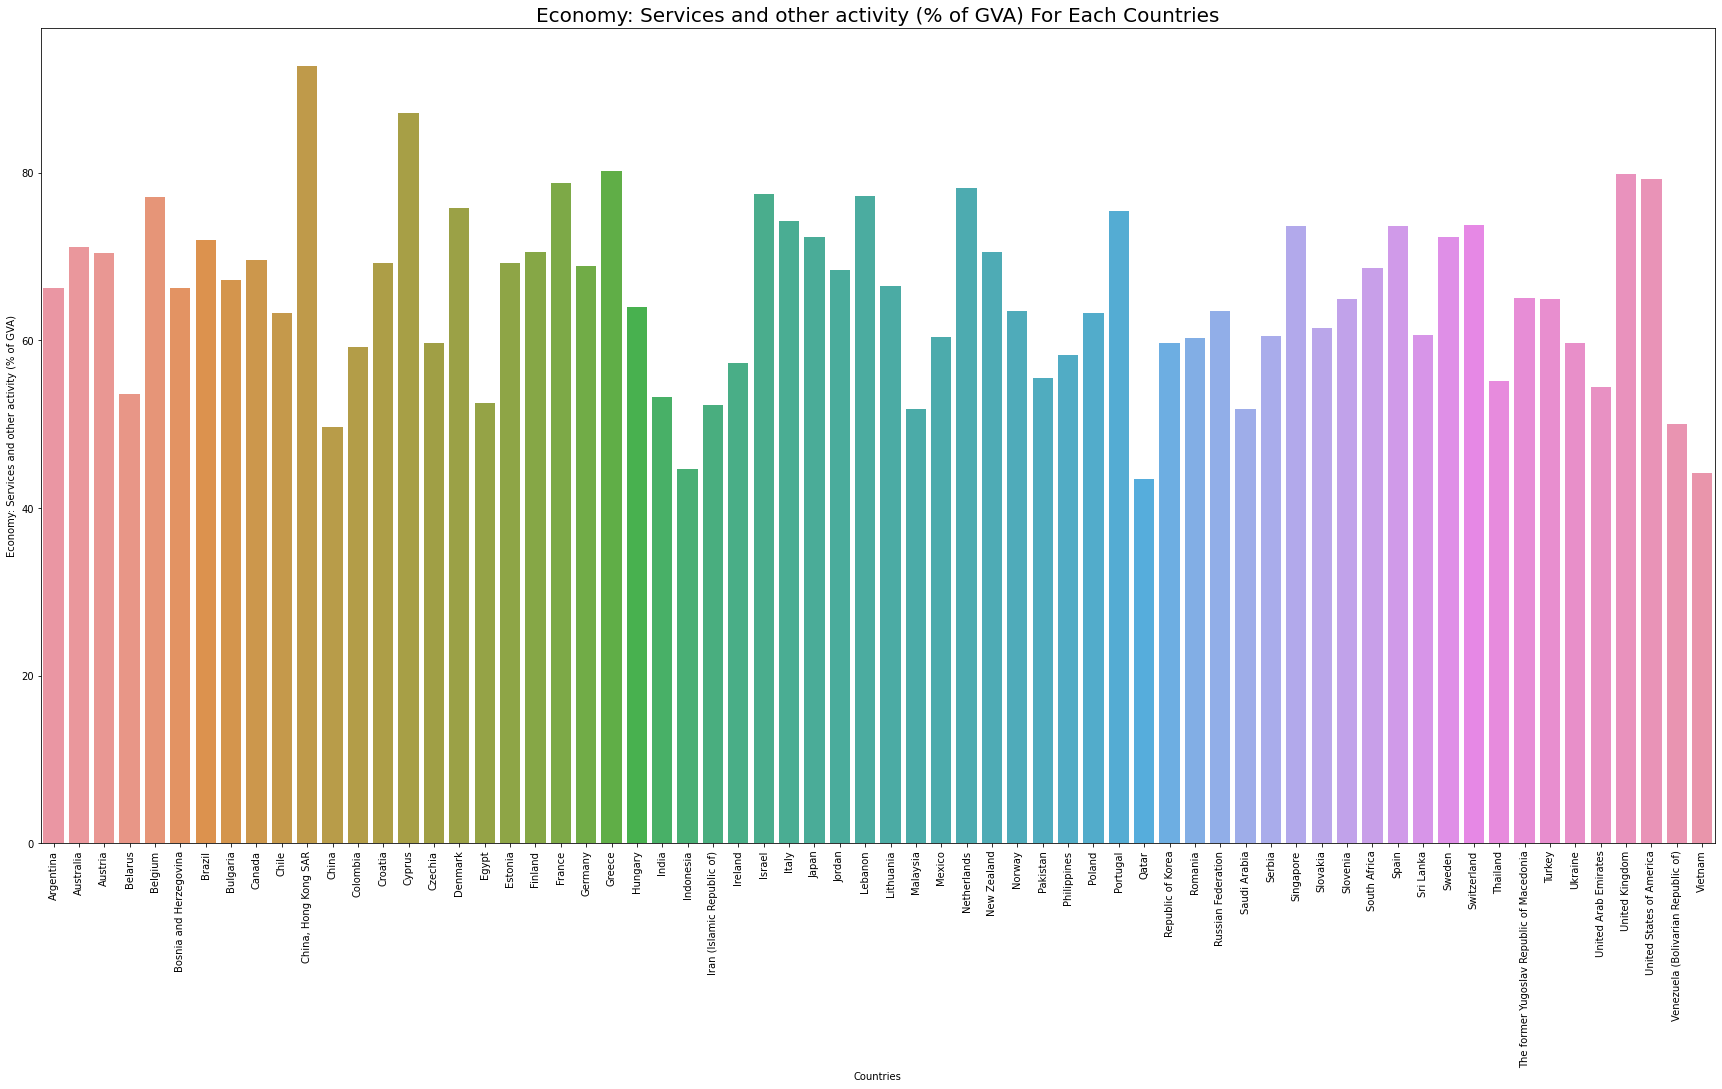

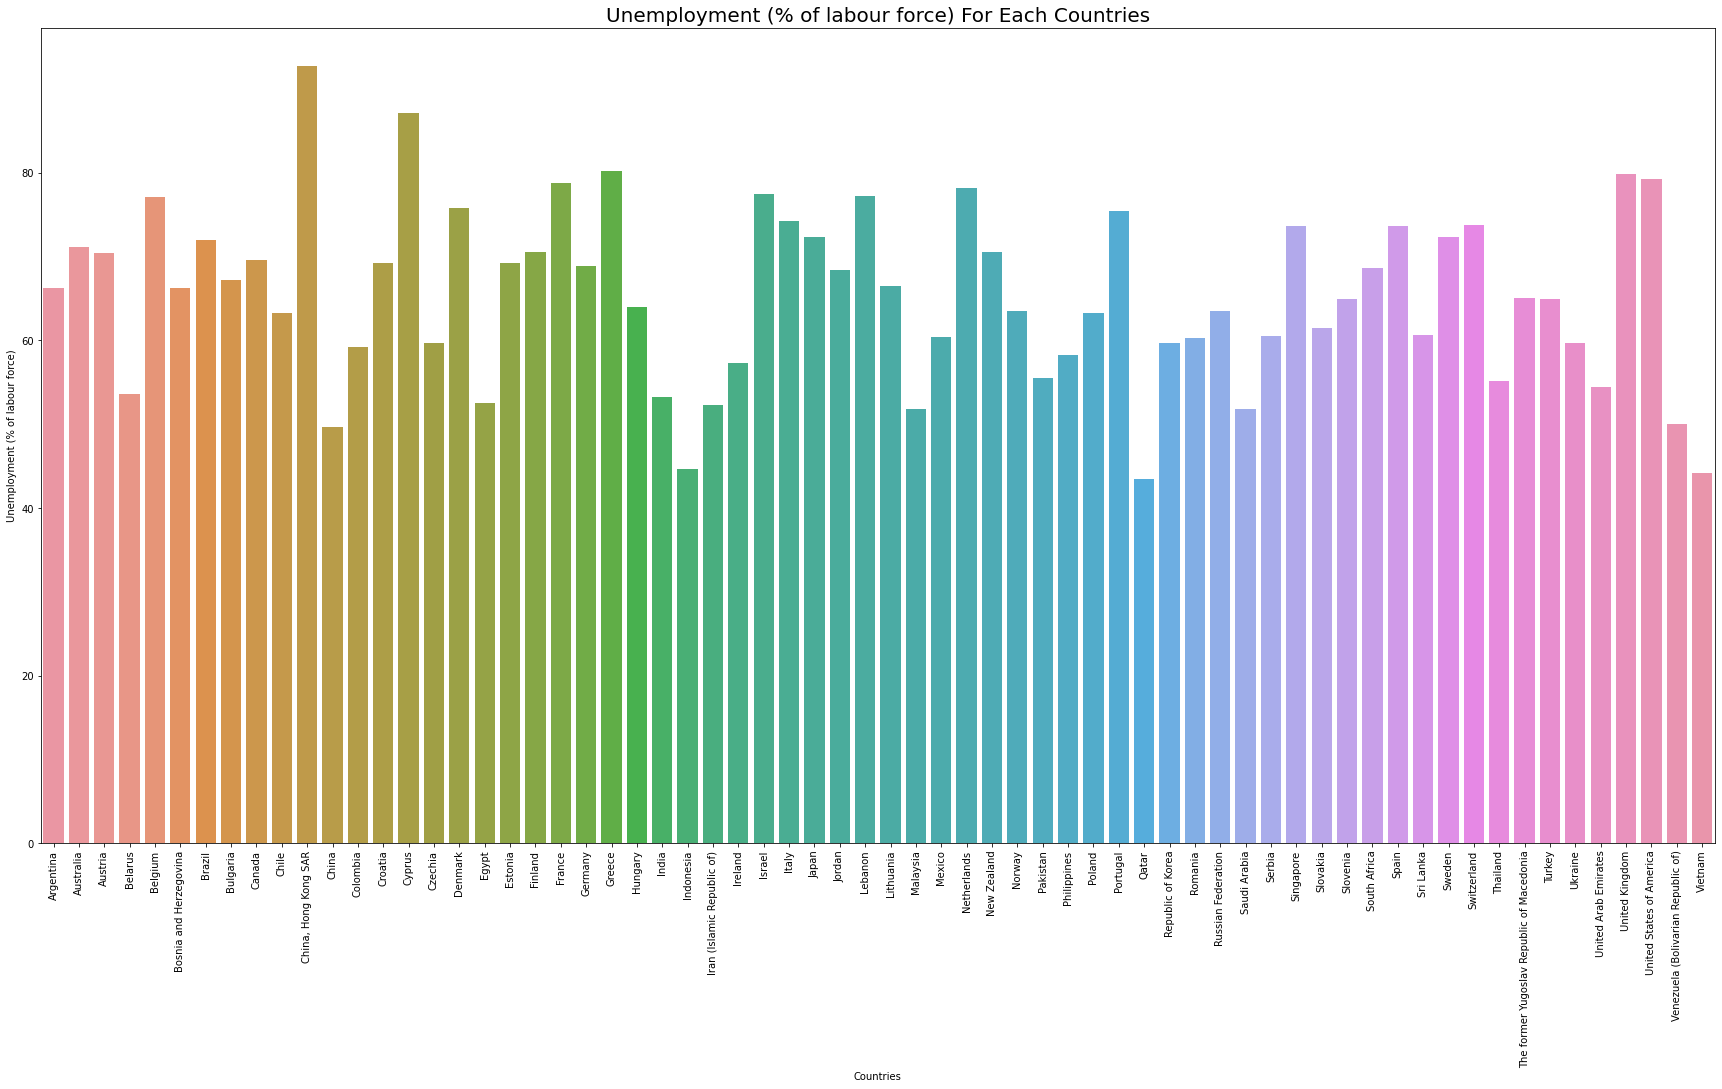

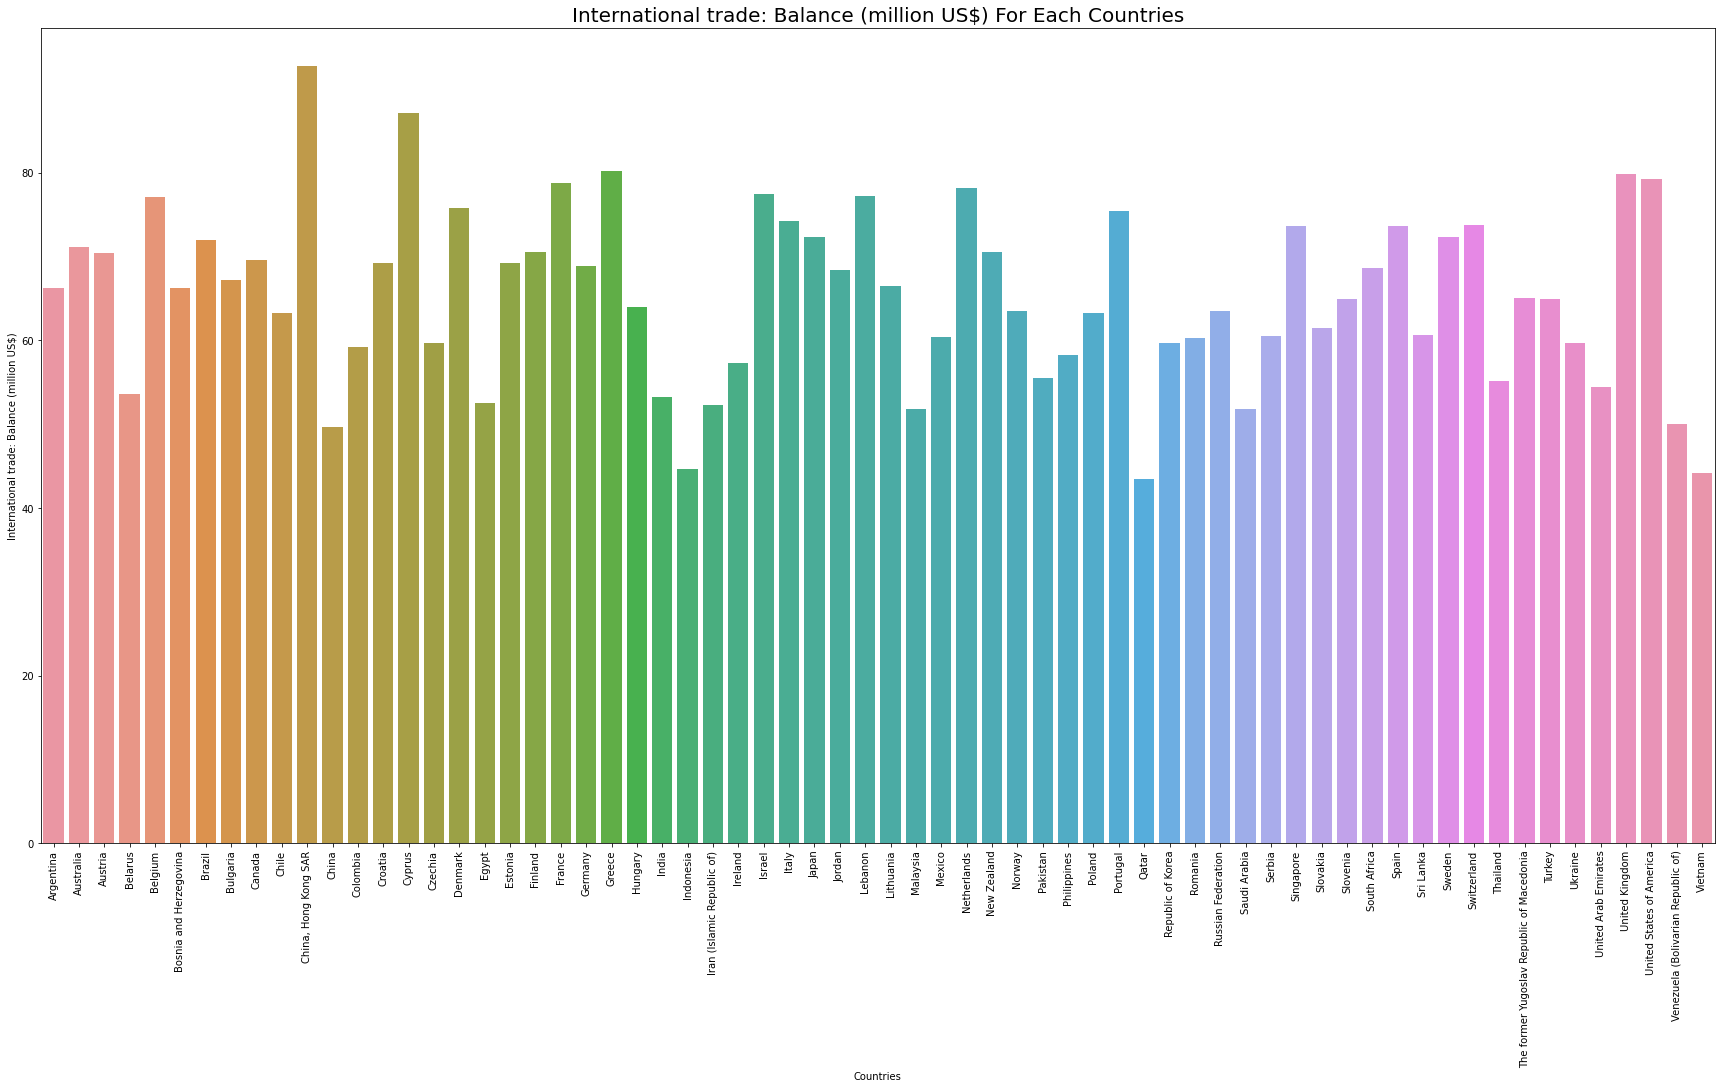

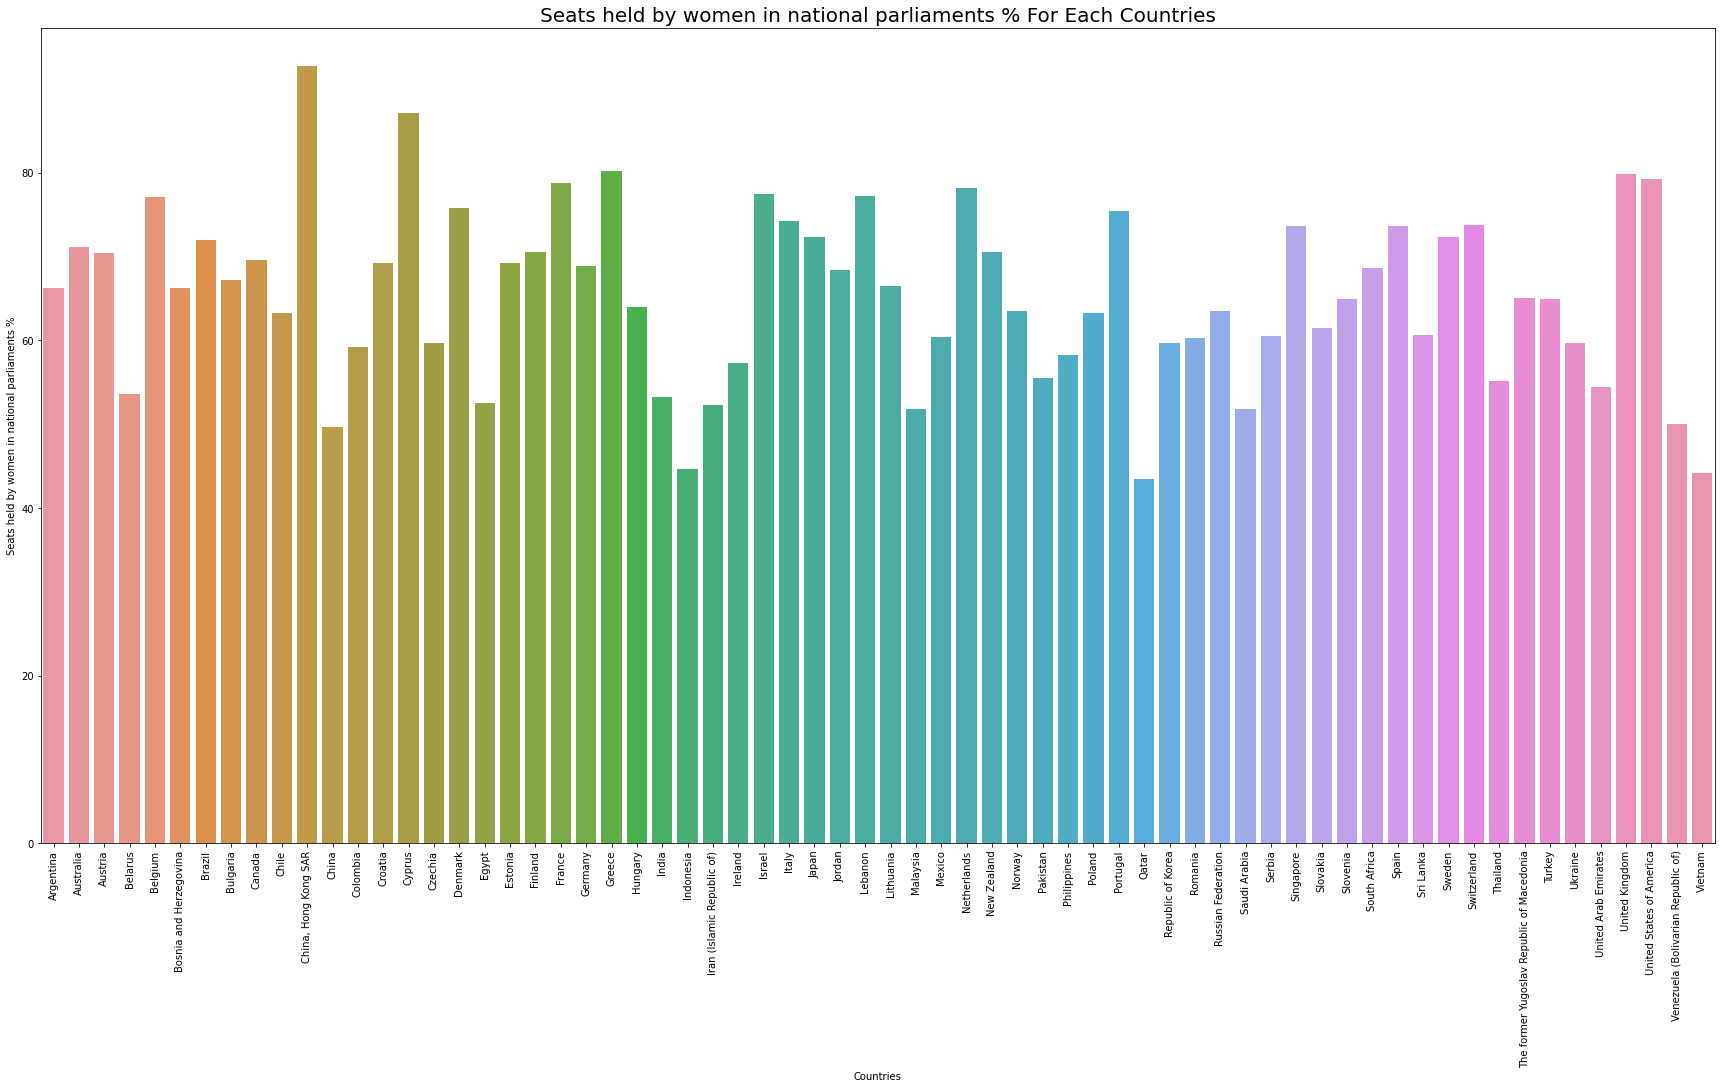

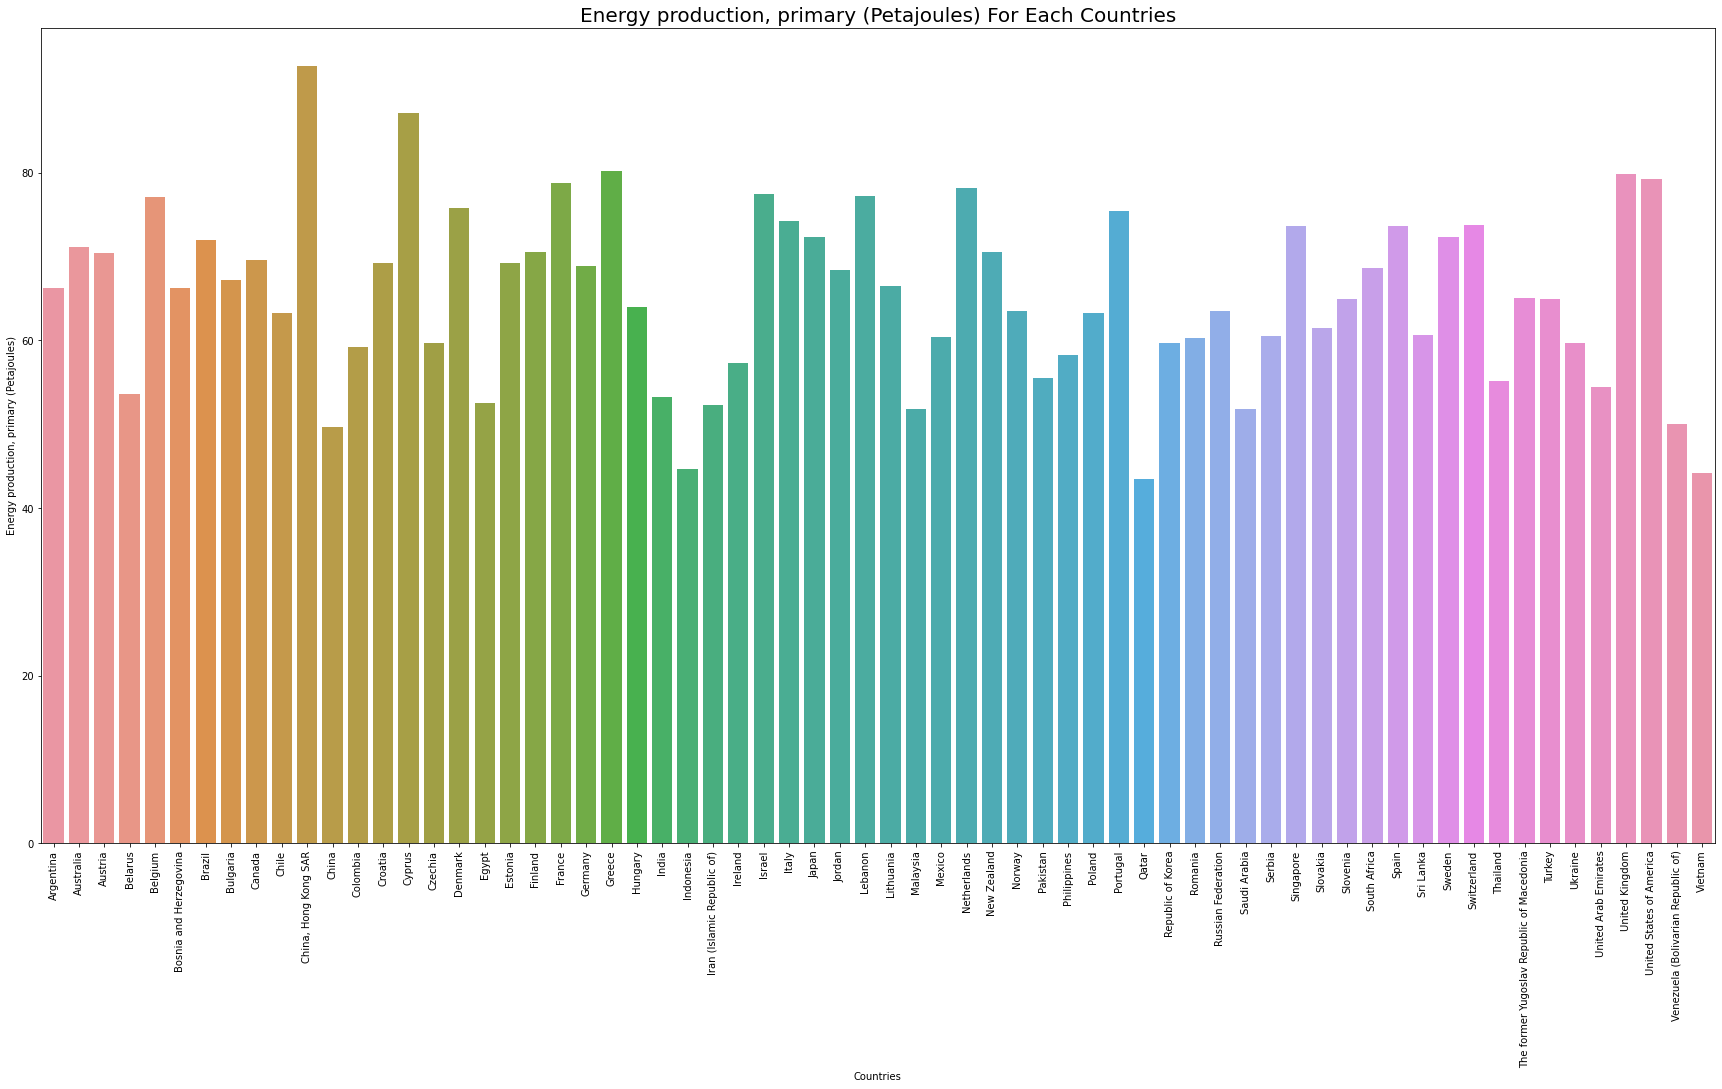

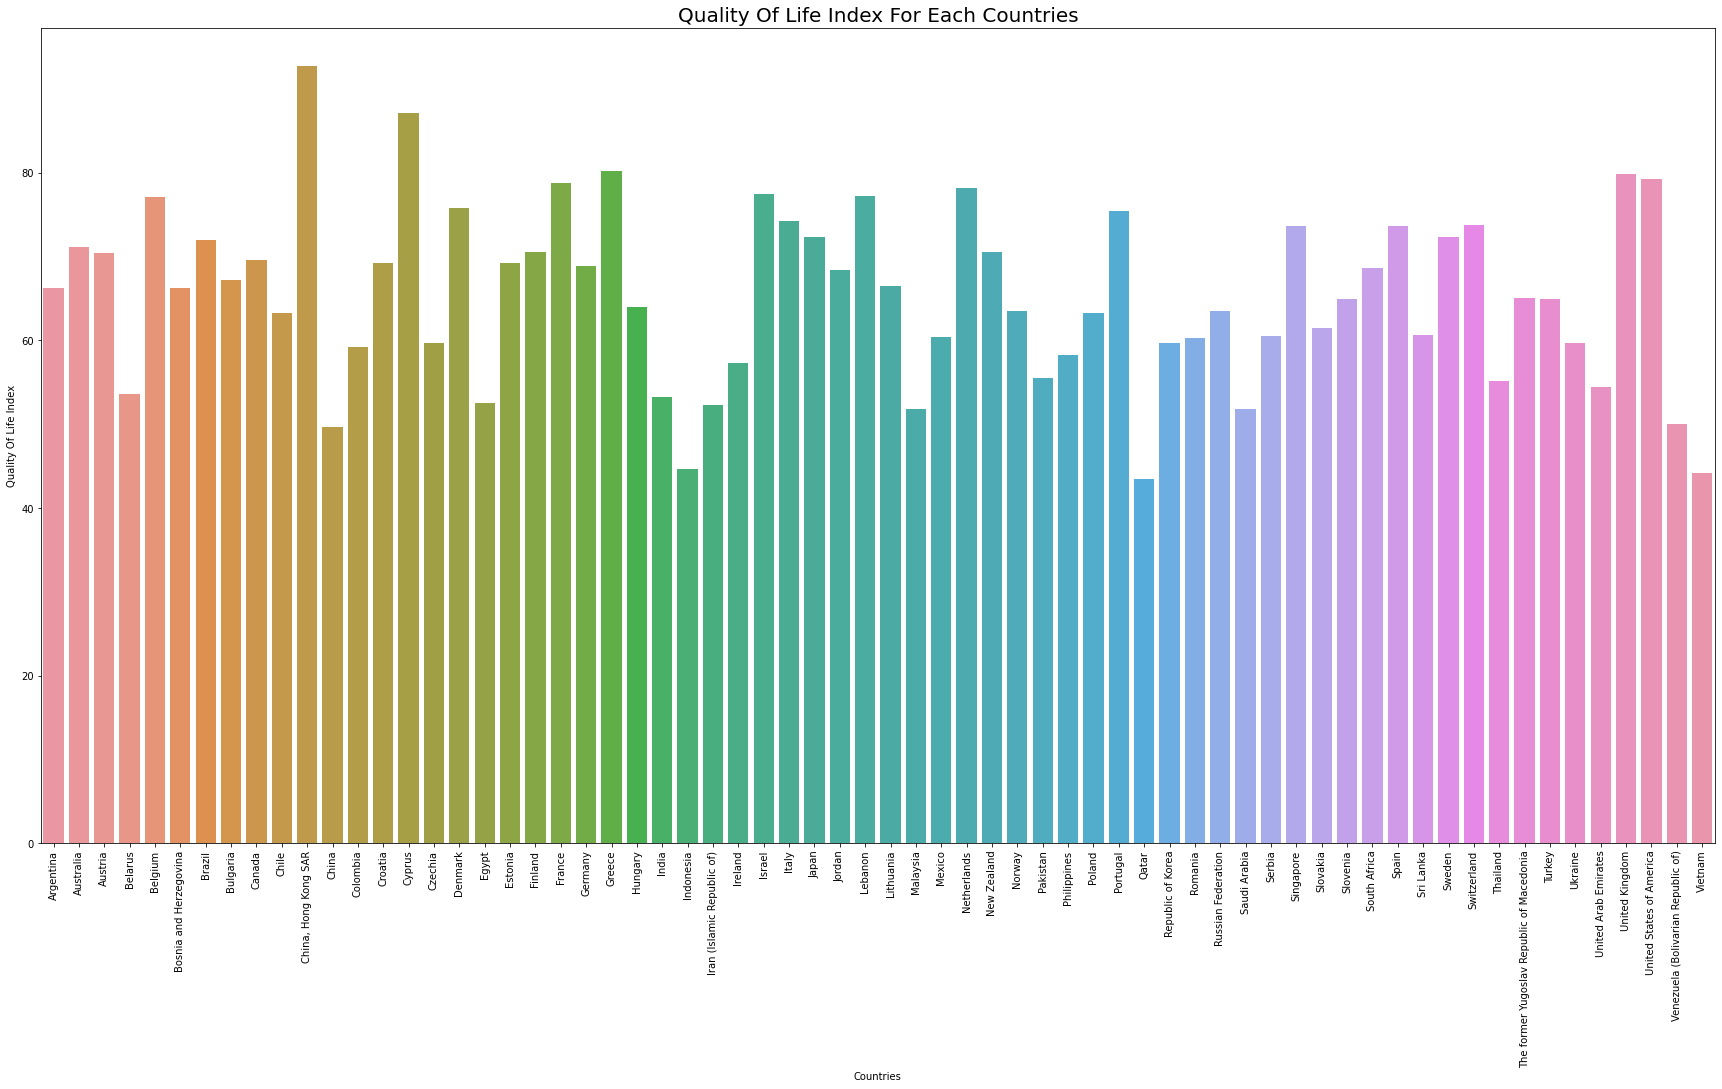

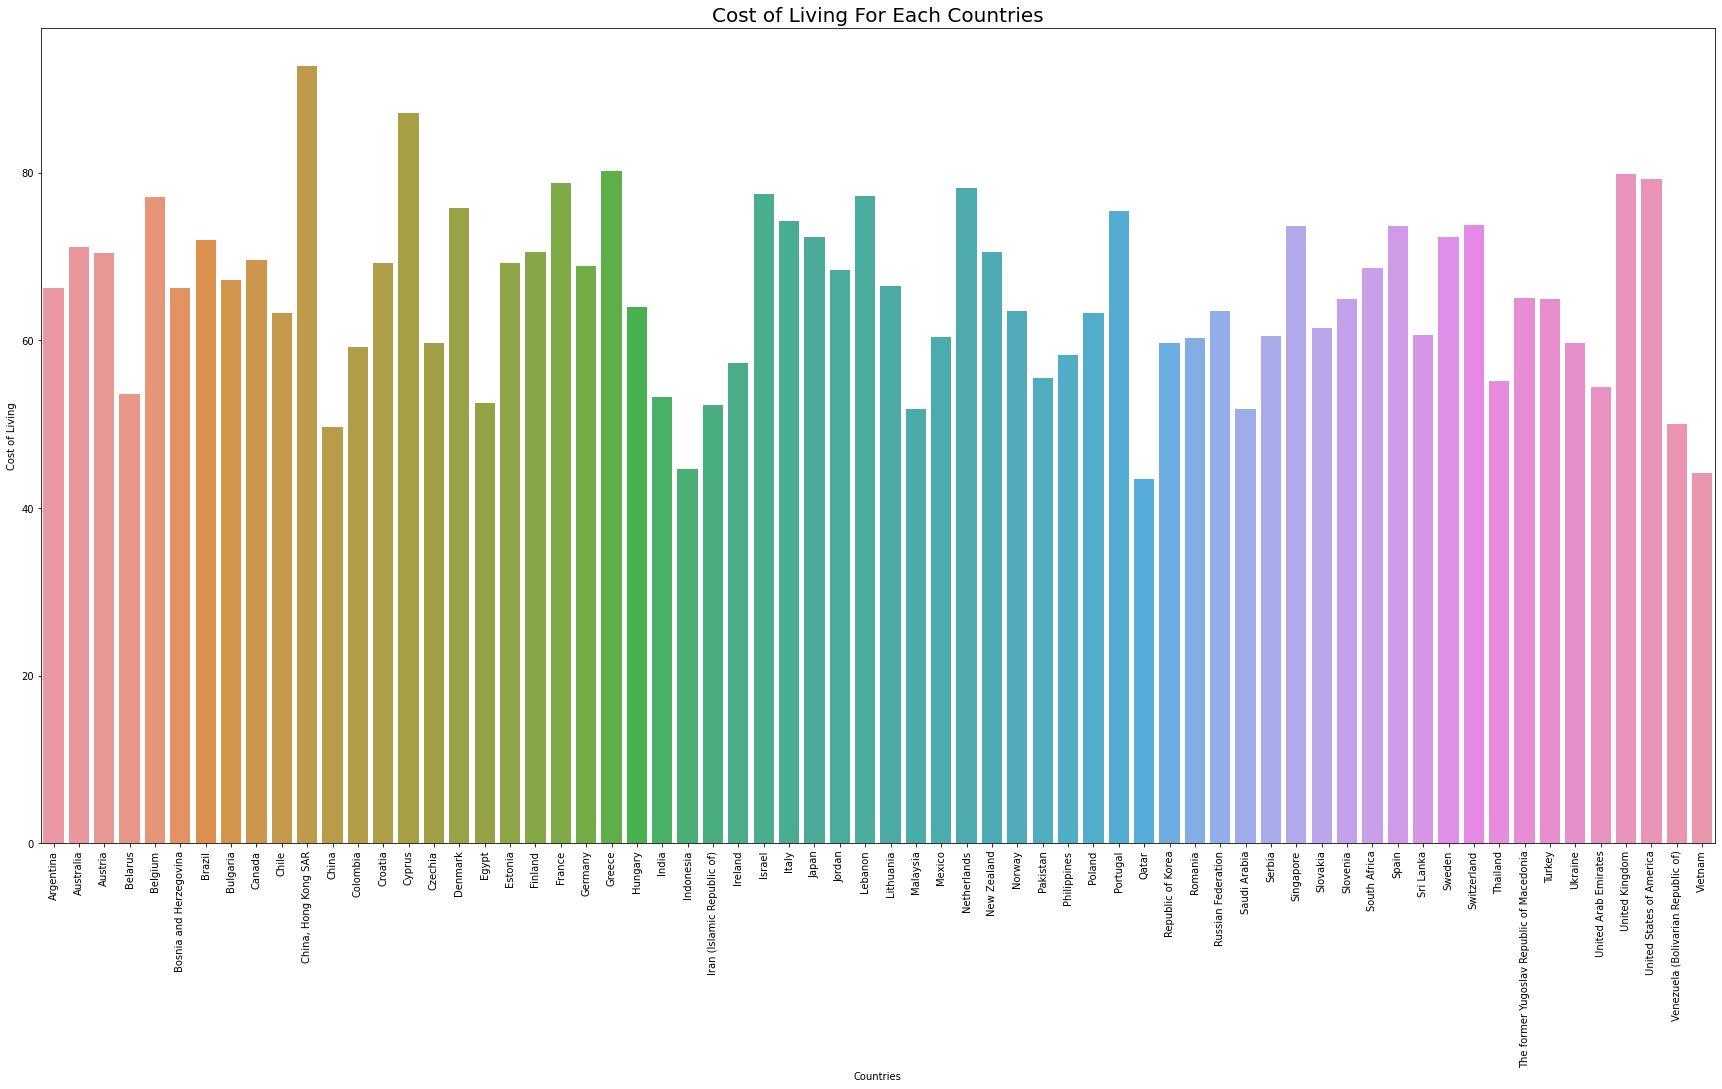

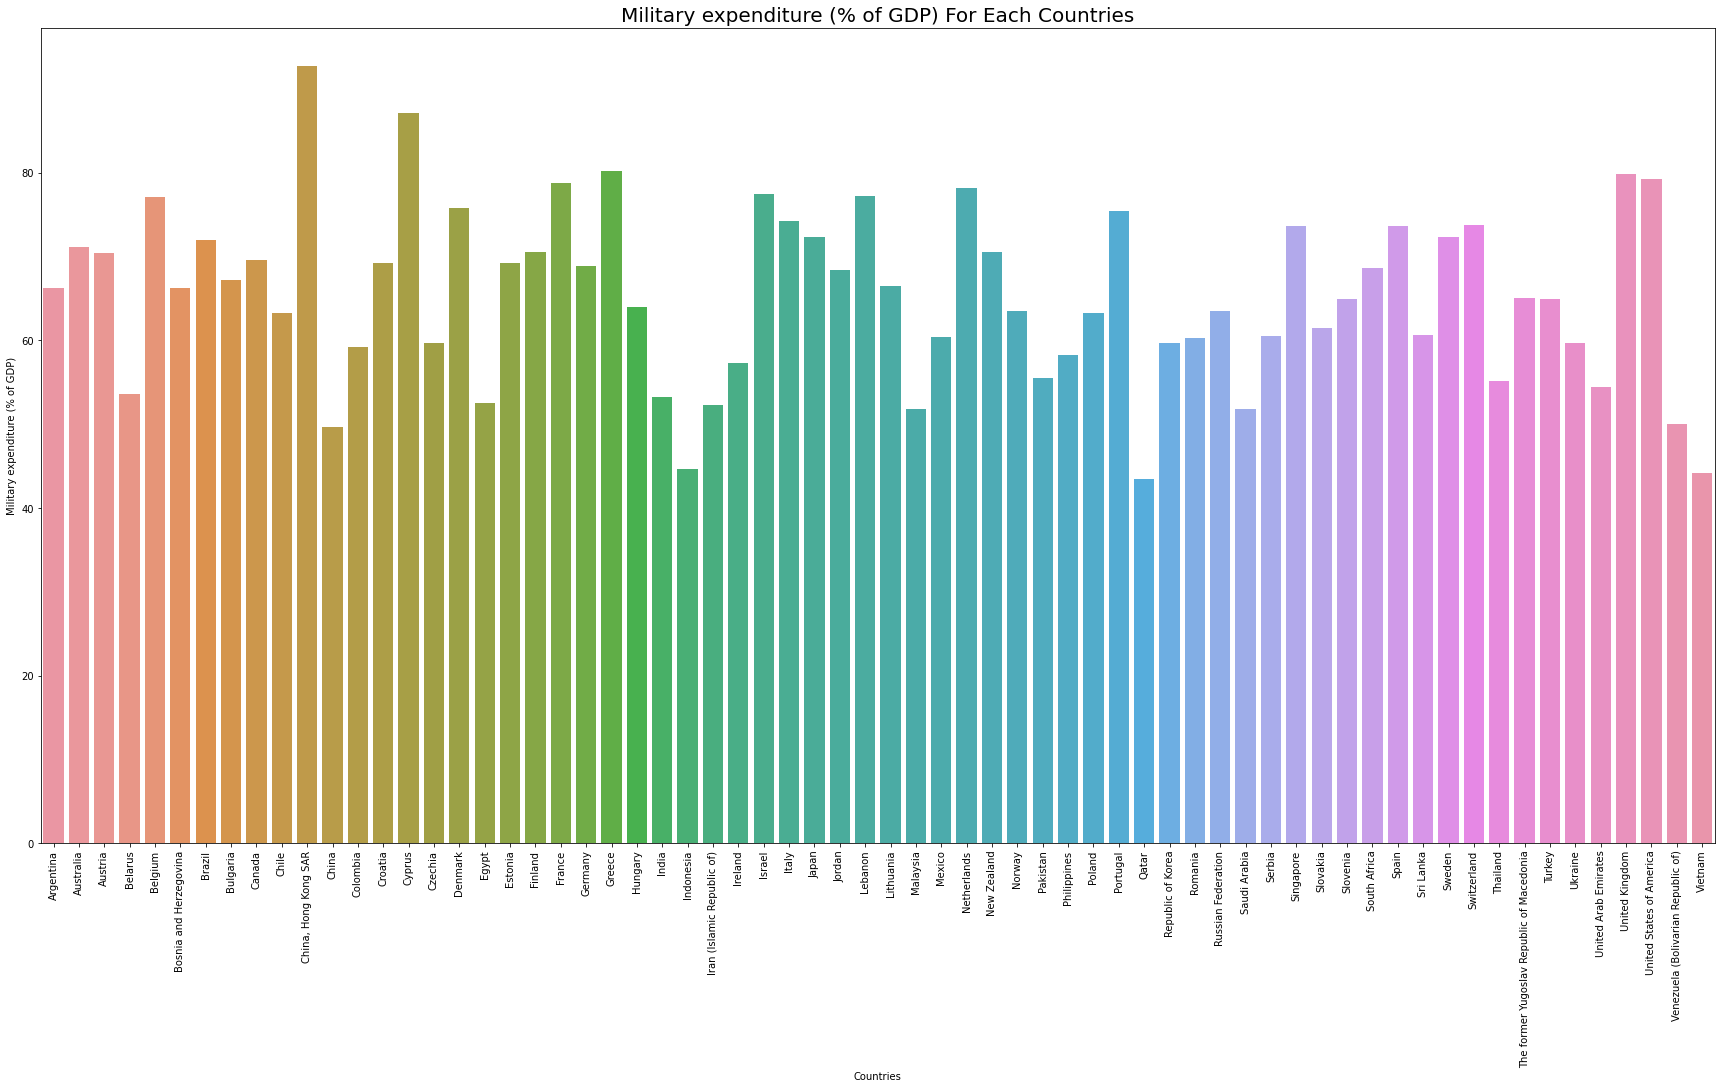

In [45]:
eda_list=["GDP growth rate (annual %, const. 2005 prices)","GDP: Gross domestic product (million current US$)",
         "Economy: Agriculture (% of GVA)","Economy: Industry (% of GVA)","Economy: Services and other activity (% of GVA)",
         "Unemployment (% of labour force)","International trade: Balance (million US$)",
          "Seats held by women in national parliaments %","Energy production, primary (Petajoules)",
         "Quality Of Life Index","Cost of Living","Military expenditure (% of GDP)"]
for i in eda_list:
    eda(df,i)

In [46]:
cat_deg,num_deg,car_deg=degisken_tiplerine_ayirma(df, 10, 20)

Dataset kolon/değişken sayısı: 95
Dataset satır/veri sayısı: 66
********************************************
Datasetin numeric değişken sayısı: 77
Datasetin numeric değişkenler: ['Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)', 'GDP: Gross domestic product (million current US$)', 'GDP growth rate (annual %, const. 2005 prices)', 'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)', 'Employment: Agriculture (% of employed)', 'Employment: Industry (% of employed)', 'Employment: Services (% of employed)', 'Unemployment (% of labour force)', 'Agricultural production index (2004-2006=100)', 'Food production index (2004-2006=100)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)', 'International trade: Balance (million US$)', 'Balance of payments, current account (million US$)', 

In [47]:
df[num_deg]=df[num_deg].fillna(df.mean())
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df[num_deg])
kumeler = kmeans.labels_
df["Class"]=kumeler
df = pd.DataFrame(df)
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y,Class
0,Argentina,SouthAmerica,2780400,44271,16.200,95.900,632343,2.400,14564.500,6.000,27.800,66.200,2.000,24.800,73.100,6.500,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.800,1.0,2.300,24.9/15.4,2086.3/4.8,5.0,13.700,4.800,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.900,143.900,69.400,256,10.000,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.590,58.400,37.370,73.300,52.570,12.070,37.950,53.330,90.670,3.770,3.900,26.530,25.640,